In [ ]:
import pandas as pd 
import numpy as np
from unidecode import unidecode
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
#model = LinearRegression()
dataTotal = pd.read_csv("dadosBrutos/train.csv") 
dataTotal.head()

,title,label_quality,language,category
0,Hidrolavadora Lavor One 120 Bar 1700w Bomba A...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,Placa De Sonido - Behringer Umc22,unreliable,spanish,SOUND_CARDS
2,Maquina De Lavar Electrolux 12 Kilos,unreliable,portuguese,WASHING_MACHINES
3,Par Disco De Freio Diant Vent Gol 8v 08/ Frema...,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,Flashes Led Pestañas Luminoso Falso Pestañas P...,unreliable,spanish,FALSE_EYELASHES


In [ ]:
dataTotal.count()

title            20000000
label_quality    20000000
language         20000000
category         20000000
dtype: int64

In [ ]:
dataTotal[dataTotal.language=='portuguese'].count()

title            10000000
label_quality    10000000
language         10000000
category         10000000
dtype: int64

In [ ]:
dataTotal[dataTotal.language=='spanish'].count()

title            10000000
label_quality    10000000
language         10000000
category         10000000
dtype: int64

In [ ]:
df_naoVisto= dataTotal[dataTotal.label_quality=='unreliable']
df_naoVisto.count()

title            18815755
label_quality    18815755
language         18815755
category         18815755
dtype: int64

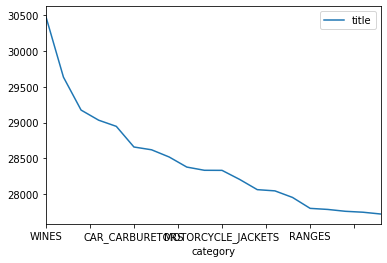

In [ ]:
df_count_naoVisto =df_naoVisto[['title','category']].groupby(['category']).count().sort_values(by=['title'], ascending=False)
df_count_naoVisto[:20].plot(kind='line')

In [ ]:
df_count_naoVisto.head(5)

,title
category,
WINES,30488
COFFEE_MAKERS,29637
SWEATERS_AND_CARDIGANS,29176
CHOCOLATES,29034
RACQUETS,28948


In [ ]:
df_visto = dataTotal[dataTotal.label_quality=='reliable']
df_visto.count()

title            1184245
label_quality    1184245
language         1184245
category         1184245
dtype: int64

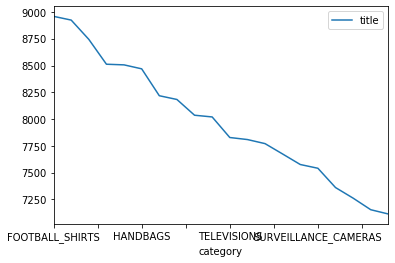

In [ ]:
 #df_visto[['title','category']].groupby(['category']).count()[:20].plot(kind='barh')
df_count_visto = df_visto[['title','category']].groupby(['category']).count().sort_values(by=['title'], ascending=False)
df_count_visto[:20].plot(kind='line')
#    df_visto_count_titulo_categoria = df_visto_count_titulo_categoria.show()
#df_visto_count_titulo_categoria.head(2)
#df_visto_count_titulo_categoria.rename(columns={1: 'a'})
#list(df_visto_count_titulo_categoria.columns) 


In [ ]:
df_count_visto.head(5)

,title
category,
FOOTBALL_SHIRTS,8959
WRISTWATCHES,8924
BOOKS,8744
ACTION_FIGURES,8512
JACKETS_AND_COATS,8506


In [ ]:
result = pd.concat([df_count_naoVisto,df_count_visto], axis=1, join='inner')
result.columns = ['Nao visto', 'Visto']
result['PC nao visto']= (result['Nao visto']/df_naoVisto['category'].count())* 100
result['PC visto']= (result['Visto']/df_visto['category'].count())* 100

result.head(15)

,Nao visto,Visto,PC nao visto,PC visto
category,,,,
WINES,30488,911,0.162034,0.076927
COFFEE_MAKERS,29637,5467,0.157512,0.461644
SWEATERS_AND_CARDIGANS,29176,432,0.155062,0.036479
CHOCOLATES,29034,4,0.154307,0.000338
RACQUETS,28948,32,0.153850,0.002702
CAR_CARBURETORS,28659,2,0.152314,0.000169
HAIR_STRAIGHTENERS,28620,104,0.152107,0.008782
BABY_CAR_SEATS,28519,5644,0.151570,0.476591
KITCHEN_SINKS,28378,2257,0.150820,0.190586


Text(0, 0.5, 'Visto')

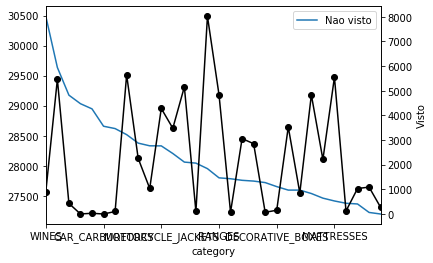

In [ ]:
result[:30].plot(y='Nao visto', stacked=True, kind="line")
ax = result['Visto'][:30].plot(secondary_y=True, color='k', marker='o')
ax.set_ylabel('Visto')

In [ ]:
df_qtd_categoria_naoVisto = df_naoVisto.groupby('label_quality').nunique()

In [ ]:
df_qtd_categoria_naoVisto.head()

,title,label_quality,language,category
label_quality,,,,
unreliable,18805105,1,2,1588


In [ ]:
df_qtd_categoria_visto = df_visto.groupby('label_quality').nunique()

In [ ]:
df_qtd_categoria_visto.head()

,title,label_quality,language,category
label_quality,,,,
reliable,1184176,1,2,1395


In [ ]:
#todos os titulos que contem as palavras
dataTotal['title'] = dataTotal['title'].str.upper() 
DataComFrete = dataTotal[(dataTotal.title.str.contains("FRETE GRATIS"))]
DataComFreteAcento=dataTotal[(dataTotal.title.str.contains("FRETE GRÁTIS"))]
DataComFreteEnvio = dataTotal[(dataTotal.title.str.contains("ENVIO GRATIS"))]
DataComBuenEstado= dataTotal[(dataTotal.title.str.contains("BUEN ESTADO"))]
DataComVariedaEnvio= dataTotal[(dataTotal.title.str.contains("VARIEDAD ENVIO"))]

In [ ]:
#quantidade de categoria no total
arrayCategoriaUnica =pd.unique( dataTotal.category)
arrayCategoriaUnica.size


1588

In [ ]:
#quantidade de titulos por categoria
def quantidaCategoria(dataFrameComCategoria):
    df = pd.DataFrame(columns=['QTD', 'Categoria'])
    for x in (arrayCategoriaUnica):  
       DataCountCategoria = dataFrameComCategoria[dataFrameComCategoria.category.str.contains(x)]
       qtdCategoria = DataCountCategoria.category.count()
       df = df.append({'QTD':qtdCategoria ,'Categoria' :x} , ignore_index=True) 
    df=df.sort_values(by=['QTD'])
    return df


DataQTDCategoriaComFrete = quantidaCategoria(DataComFrete)
DataQTDCategoriaDataComFreteAcento=quantidaCategoria(DataComFreteAcento)
DataQTDCategoriaDataComFreteEnvio=quantidaCategoria(DataComFreteEnvio)
DataQTDCategoriaDataComBuenEstado=quantidaCategoria(DataComBuenEstado)
DataQTDCategoriaDataComVariedaEnvio=quantidaCategoria(DataComVariedaEnvio)


In [ ]:
#quantidade que a palavra x aconteceu 
tamanhoComFrete= (DataQTDCategoriaComFrete[DataQTDCategoriaComFrete.QTD!=0]).sum()
tamanhoComFreteAcento=(DataQTDCategoriaDataComFreteAcento[DataQTDCategoriaDataComFreteAcento.QTD!=0]).sum()
tamanhoComFreteEnvio=(DataQTDCategoriaDataComFreteEnvio[DataQTDCategoriaDataComFreteEnvio.QTD!=0]).sum()
tamanhoComBuenEstado=(DataQTDCategoriaDataComBuenEstado[DataQTDCategoriaDataComBuenEstado.QTD!=0]).sum()
tamanhoComVariedaEnvio= (DataQTDCategoriaDataComVariedaEnvio[DataQTDCategoriaDataComVariedaEnvio.QTD!=0]).sum()

In [ ]:
print("Total score for %s %s  %s  %s  %s" % (tamanhoComFrete.QTD, tamanhoComFreteAcento.QTD,
                                    tamanhoComFreteEnvio.QTD,tamanhoComBuenEstado.QTD,
                                    tamanhoComVariedaEnvio.QTD))

Total score for 46506 106974  49368  21574  0.0


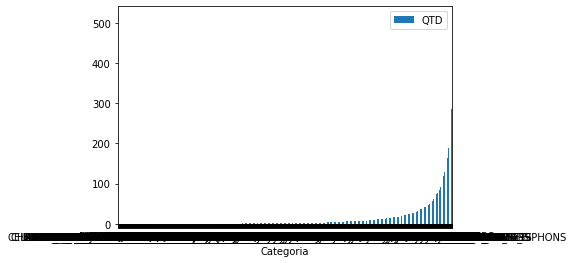

In [ ]:
ax = DataQTDCategoriaDataComBuenEstado.plot.bar(x='Categoria', y='QTD', rot=0)

In [ ]:
#DataQTDCategoriaComFrete.sort_values(by=['QTD'], ascending=False ).head(20)
DataQTDCategoriaDataComFreteAcento.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComFreteEnvio.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComBuenEstado.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComVariedaEnvio.sort_values(by=['QTD'], ascending=False ).head(20)


,QTD,Categoria
865,1740,BELTS
1366,1525,TREADMILL_RUNNING_BELTS
568,1028,SUITS
307,914,VIDEO_GAMES
1382,854,LAPTOP_SKINS
624,839,SHIRTS
773,778,EROTIC_CREAMS
529,769,MALE_MASTURBATORS
746,760,GAME_CONSOLE_AND_VIDEO_GAME_CONTROLLER_SKINS
676,750,RUM


In [ ]:
DataQTDCategoriaComFrete 
DataQTDCategoriaDataComFreteAcento
DataQTDCategoriaDataComFreteEnvio
DataQTDCategoriaDataComBuenEstado
DataQTDCategoriaDataComVariedaEnvio


,QTD,Categoria
0,0,ELECTRIC_PRESSURE_WASHERS
1064,0,BODY_SKIN_CARE_PRODUCTS
1063,0,CAN_OPENERS
1062,0,ANTIVIRUS_AND_INTERNET_SECURITY
1061,0,WET_BABY_WIPES
1060,0,ELECTRIC_GRILLS
1059,0,MILK_EXTRACTORS
1058,0,AUTOMOTIVE_SIDE_VIEW_MIRRORS
1057,0,WARDROBES
1056,0,AUTOMOTIVE_MANUAL_TRANSMISSION_SHIFT_LEVERS
